In [32]:
def rev(x):
    return x[::-1]
rev('forward')

'drawrof'

In [185]:
#Write a function bayes() that can be used to calculate the posterior probability of an event A, given the 
#known outcome of:
# - event B and the prior probability of A
# - B conditional on A
# - B conditional on not-A
## we know P(B|A) and P(A) , P(B|~A)
def bayes(PA, PBGA, PBGNA):
    #PB = P(AB)+ P(~AB)
    PB = (PBGA * PA)+ PBGNA/(1-PA)
    PAGB = (PBGA * PA)/PB
    return PAGB
bayes(0.1, 0.6, 0.2)



0.21259842519685035

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns 

In [5]:
#importing dataset from csv
teams = pd.read_csv("lahman-teams.csv")
#Looking at the data, it has 48 columns and 2805 rows
teams.info()
#looking at number of rows
len(teams)
#Finding missing values
teams.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2755 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   0
SO                 120
SB                 144
CS                 859
HBP               2325
SF                2325
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                 317
FP                   0
name                 0
park                34
attendance         279
BPF        

In [7]:
#Looking at top 5 rows in data
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [9]:
teams['teamID'].value_counts()

CHN    140
PHI    133
PIT    129
CIN    126
SLN    124
      ... 
KEO      1
RC1      1
MID      1
BFP      1
WS9      1
Name: teamID, Length: 149, dtype: int64

In [10]:
teams['teamID'].nunique()

149

In [11]:
teams['yearID'] >= 1995

0       False
1       False
2       False
3       False
4       False
        ...  
2800     True
2801     True
2802     True
2803     True
2804     True
Name: yearID, Length: 2805, dtype: bool

In [17]:
teams_1995 = teams[teams['yearID'] >= 1995]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815.0,101,98,LAD,LAN,LAN
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,145.0,0.987,San Francisco Giants,AT&T Park,3375882.0,99,97,SFG,SFN,SFN
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145.0,107,106,ARI,ARI,ARI
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,138.0,0.985,San Diego Padres,Petco Park,2459742.0,98,97,SDP,SDN,SDN
2804,2015,NL,COL,COL,W,5,162,81.0,68,94,...,171.0,0.985,Colorado Rockies,Coors Field,2506789.0,119,118,COL,COL,COL


count    624.000000
mean      98.673077
std       31.800727
min       31.000000
25%       73.000000
50%       96.000000
75%      119.000000
max      201.000000
Name: SB, dtype: float64

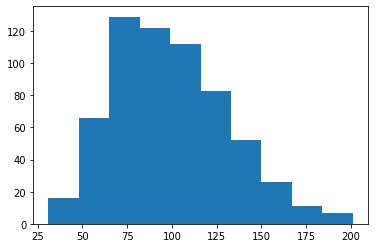

In [22]:
#Plotting a histogram for Stolen Bases per game since 1995
plt.hist(teams_1995. SB)
teams_1995['SB'].describe()
#it appears that the distibution is slightly skewed towards right

(array([  1.,  13.,  32., 120., 131., 118., 127.,  71.,   9.,   2.]),
 array([ 43. ,  50.3,  57.6,  64.9,  72.2,  79.5,  86.8,  94.1, 101.4,
        108.7, 116. ]),
 <a list of 10 Patch objects>)

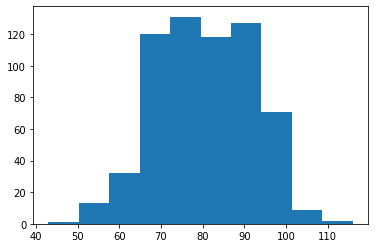

In [21]:
#Plotting a histogram for Wins since 1995
plt.hist(teams_1995.W)
#it appears that the variable wins is following normal distribution

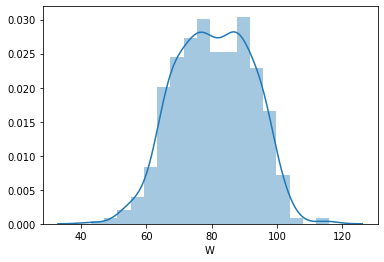

In [26]:
#checking the distribution with QQ plot
ax2 = sns.distplot(teams_1995.W)

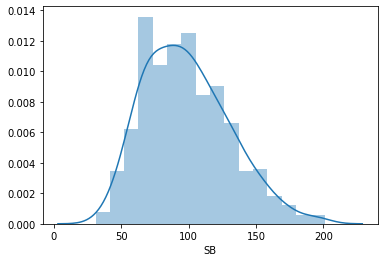

In [27]:
##checking the distribution with QQ plot
ax1 = sns.distplot(teams_1995.SB)

(array([ 16.,  56., 103., 156., 126., 100.,  47.,  16.,   3.,   1.]),
 array([2.94 , 3.284, 3.628, 3.972, 4.316, 4.66 , 5.004, 5.348, 5.692,
        6.036, 6.38 ]),
 <a list of 10 Patch objects>)

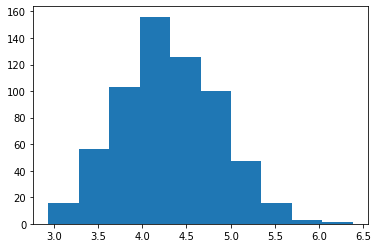

In [28]:
#histogram for variable ERA
plt.hist(teams_1995['ERA'])

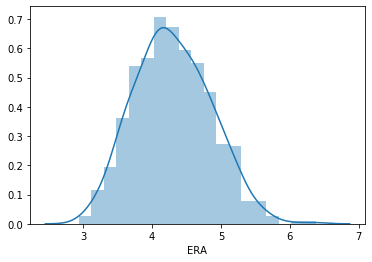

In [29]:
##checking the distribution with QQ plot
sns.distplot(teams_1995['ERA'])
#VARIABLE ERA IS FOLLOWING NORMAL DISTRIBUTION

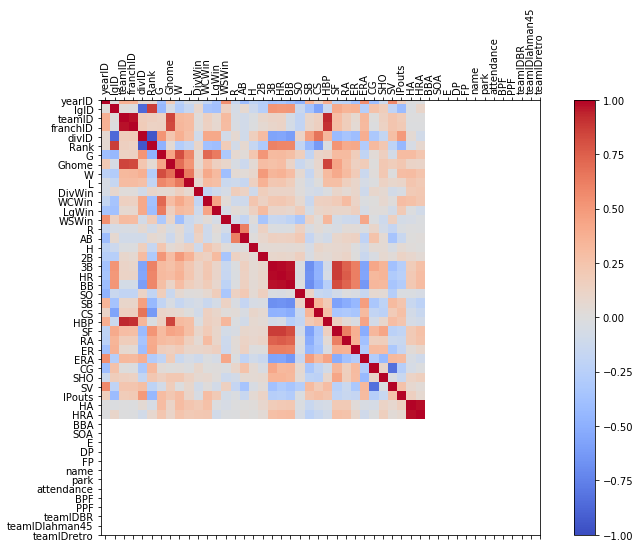

In [104]:
corr = teams_1995.corr()
fig = plt.figure(figsize= (12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(teams_1995.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(teams_1995.columns)
ax.set_yticklabels(teams_1995.columns)
plt.show()

In [103]:
teams_1995.corr()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
yearID,1.000000,0.022269,0.367340,0.365277,0.060672,0.060867,-0.385195,0.195462,-0.223833,-0.050959,...,-0.207900,-0.232665,-0.368648,0.551743,-0.390934,-0.114953,0.574168,0.160323,-0.007747,-0.007964
Rank,0.022269,1.000000,0.016677,-0.006942,-0.863998,0.872770,-0.442457,-0.050315,-0.278540,-0.163972,...,0.407363,0.346866,0.361046,-0.264860,0.260938,0.176721,-0.195845,-0.411316,-0.022917,0.095079
G,0.367340,0.016677,1.000000,0.968998,0.172994,0.151331,0.132309,0.849826,0.326821,0.297314,...,0.296420,0.177871,0.064320,0.322117,0.001897,0.145008,0.238228,0.184114,-0.005340,-0.006137
Ghome,0.365277,-0.006942,0.968998,1.000000,0.185547,0.128816,0.136794,0.830716,0.331353,0.297788,...,0.283503,0.175955,0.050160,0.316842,-0.010314,0.130831,0.238588,0.202183,-0.011593,-0.014100
W,0.060672,-0.863998,0.172994,0.185547,1.000000,-0.947283,0.519126,0.227550,0.375258,0.276727,...,-0.418942,-0.347610,-0.394061,0.388544,-0.315664,-0.175089,0.288436,0.499520,0.048555,-0.079277
L,0.060867,0.872770,0.151331,0.128816,-0.947283,1.000000,-0.478956,0.047664,-0.270889,-0.181546,...,0.515658,0.405778,0.415498,-0.283531,0.316276,0.222657,-0.209830,-0.441406,-0.050210,0.077916
R,-0.385195,-0.442457,0.132309,0.136794,0.519126,-0.478956,1.000000,0.437538,0.813432,0.583125,...,0.310614,0.312145,0.173694,-0.189962,0.039045,0.154227,-0.076116,0.297219,0.300926,0.228502
AB,0.195462,-0.050315,0.849826,0.830716,0.227550,0.047664,0.437538,1.000000,0.692250,0.522256,...,0.439154,0.288660,0.148294,0.181285,0.006696,0.213688,0.177236,0.221599,0.116160,0.101674
H,-0.223833,-0.278540,0.326821,0.331353,0.375258,-0.270889,0.813432,0.692250,1.000000,0.648142,...,0.408703,0.305757,0.187544,-0.127217,0.015735,0.211374,-0.002341,0.296032,0.298190,0.247813
2B,-0.050959,-0.163972,0.297314,0.297788,0.276727,-0.181546,0.583125,0.522256,0.648142,1.000000,...,0.281461,0.162781,0.096856,-0.058020,-0.009138,0.128505,0.086209,0.103523,0.237604,0.203106


In [105]:
#'HRA' has high possitive correlation with variable "RA", "ER" and "ERA", also HA has high correlation with 
# the same variables
# Variables PPF and BPF has high possitive correlation
# Variable E and FP has high negative correlation
# High Correlation between H and R, H&BB, H&2B
# Data has a lot of missing values
# if we drop all the missing values we will be left with 480 rows in teams dataset
# H and R are highly correlated, if you hit more , you get more runs

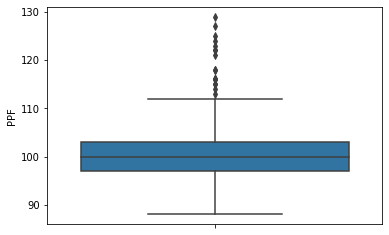

In [120]:
sns.boxplot( y = 'PPF', data = teams_1995)
#it appears that there are outliers in PPF

Text(0.5, 1.0, 'BoxPlots showing Outliers')

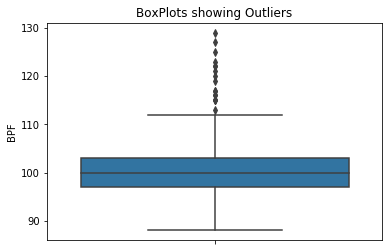

In [164]:
sns.boxplot(y = 'BPF', data = teams_1995)
plt.title("BoxPlots showing Outliers")
#it appears that there are outliers in BPF

Text(0.5, 1.0, 'Scatterplot showing negative correlation')

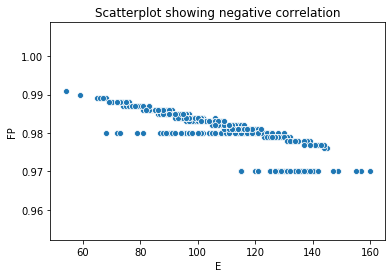

In [163]:
sns.scatterplot(x = "E", y = "FP",data = teams_1995)
plt.title("Scatterplot showing negative correlation")
#E and FP has high negative correlation

In [125]:
#Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations 
#each time. Plot the frequencies of the sample means. What distribution does this appear to follow?
teams['SB'].sample(1000)

2504     45.0
821      63.0
894      72.0
1903     39.0
968      77.0
        ...  
1897    160.0
2300    110.0
848      80.0
2142     39.0
2456     96.0
Name: SB, Length: 1000, dtype: float64

[111.34408602150538, 115.34042553191489, 95.51020408163265, 112.72164948453609, 119.02197802197803, 111.27083333333333, 105.66666666666667, 110.54255319148936, 113.37894736842105]


Text(0.5, 1.0, 'Histogram of Means')

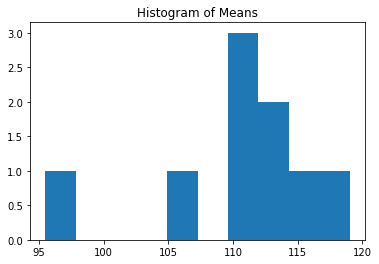

In [167]:
results = []
for samples_sb in range(1,10):
    samples_sb = teams['SB'].sample(100)
    sb_means = samples_sb.mean()
    results.append(sb_means)
	
print(results)
plt.hist(results)
plt.title("Histogram of Means")

[73.71, 79.02, 74.38, 74.31, 67.45, 75.56, 73.13, 75.76, 74.21]


Text(0.5, 1.0, 'Histogram of Means')

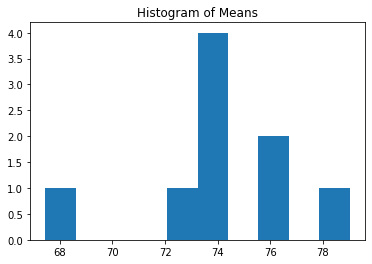

In [182]:
#Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations 
#each time. Plot the frequencies of the sample means. What distribution does this appear to follow?
results1 = []
for samples_w in range(1,10):
    samples_w = teams['W'].sample(100)
    w_means = samples_w.mean()
    results1.append(w_means)
	
print(results1)
plt.hist(results1)
plt.title("Histogram of Means")